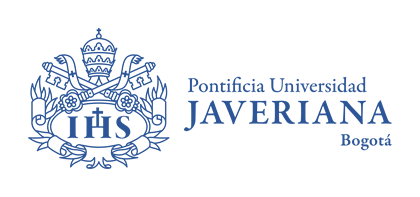

# Análisis de algoritmos - Ejemplo análisis regresión
## Uso de statsmodels para análisis de resultados
Este notebook tiene como objetivo familiarizar al estudiante con el uso del paquete statsmodels de Python para el análisis de resultados experimentales


In [ ]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Carga de los archivos

Mediante el uso de la librería pandas, podemos cargar un archivo en formato 'csv' que generamos mediante nuestros experimentos.

In [ ]:
df_results = pd.read_csv("data.res", sep=',', header=None, names=['n','bubble','insertion','quick'])

In [ ]:
df_results.head()

 Con la función plot, podemos revisar el comportamiento del tiempo de ejecución a medida que incrementamos el tamaño de la entrada

In [ ]:
df_results.plot(y=['bubble','insertion','quick'],x='n')

# statsmodels API

Statsmodels es un paquete de estadística de Python que nos permite realizar de forma sencilla regresiones y confirmar si nuestra hipótesis teórica sobre el comportamiento de un algoritmo coincide con lo que estamos observando experimentalmente.

La función [`ols`](https://www.statsmodels.org/stable/generated/statsmodels.regression.linear_model.OLS.html) realiza una regresión de mínimos cuadrados para ver si nuestra variable dependiente (n) se relaciona con la variable independiente (tiempo).

En nuestro DataFrame quedó registrado el tiempo del algoritmo `bubblesort` en la columna `bubble` del algoritmo. Nuestra hipótesis teórica es que este algoritmo es cuadrático, para realizar la confirmación de esta hipótesis vamos a relacionar ambas variables con la siguiente fórmula:

`bubble ~ np.power(n,2)`

Nota: Para ver la sintaxis de cómo se pueden expresar estas fórmulas, puede conocer más en el siguiente link:

https://www.statsmodels.org/devel/example_formulas.html


In [ ]:
# ver https://www.statsmodels.org/devel/example_formulas.html

In [ ]:
mod = smf.ols(formula='bubble ~ np.power(n,2)', data=df_results)

In [ ]:
res = mod.fit()

In [ ]:
print(res.summary())

Los parámetros nos indican la relación encontrada entre las variables

In [ ]:
res.params


El plot_fit nos indica qué tanto ajuste logró la regresión vs los valores reales. Diferencias importantes para n pequeños o n grandes nos indicarían que no se está ajustando de forma correcta a la hipótesis.

In [ ]:
sm.graphics.plot_fit(res,"np.power(n, 2)")

El siguiente código prueba el resultado de la hipótesis de la complejidad teórica del quicksort vs lo obtenido.

In [ ]:
mod = smf.ols(formula='quick ~ n:np.log2(n)', data=df_results)

In [ ]:
res = mod.fit()

In [ ]:
print(res.summary())

In [ ]:
res.params

In [ ]:
sm.graphics.plot_fit(res, "n:np.log2(n)")

In [ ]:
mod = smf.ols(formula='insertion ~ np.power(n,2)', data=df_results)

In [ ]:
res = mod.fit()

In [ ]:
print(res.summary())

In [ ]:
res.params

In [ ]:
sm.graphics.plot_fit(res, "np.power(n, 2)")